Title: 11.2 Exercises

Author: Chad Wood

Date: 16 Feb 2022

Modified By: Chad Wood

Description: This program demonstrates the use of python to solve logic, statistical, and mathmatical problems while testing the central limit theorem.

## 1. Using the Binomial Distribution

An ensemble model is a model that uses multiple different models to build a better model. E.g., a
random forest classifier uses multiple decision trees to “vote” for the best answer. For this exercise,
assume that an ensemble model uses majority vote to predict a binary target and that each individual
model is independent of every other model. Use Python code to answer the following questions.

    (a) If an ensemble model is composed of 15 individual models that each have 63% accuracy, what is the ensemble model accuracy?
    (b) What would the accuracy of the 15 individual models need to be in order for the ensemble model to have 95% accuracy? Find the smallest whole number percentage so this is satisfied.
    (c) If each individual model has 63% accuracy, how many individual models are needed for the ensemble model to have 95% accuracy? Find the smallest odd number of models (so there is a clear majority), so that this is satisfied.
    
Hint: The binom package from scipy.stats is useful for this problem, but make sure you are using
the correct functions for your calculations.

In [2]:
import math

# Performs binomial probability calculation
def probability(n, k, p):
    coef = math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
    p_success = p**k
    p_fail = (1-p)**(n-k)
    
    return coef * p_success * p_fail

In [3]:
# (a)
n = 15
p = 0.63
majority = int((n+1)/2)
'''
(a) An ensemble model of 15 individual models would have a majority of 8. 
Accuracy is found using the binomial probability formula for k = 8 or more successes. 
'''
# Sums P(8 correct), P(9 correct), ..., P(15 correct)
accuracy = sum(probability(n, i, p) for i in range(majority, n+1))

print(f'Accuracy of ensemble model as described: {accuracy}')

Accuracy of ensemble model as described: 0.8512830492077244


In [4]:
# (b)
p_tmp = p
accuracy = 0

# Increases p by .001 until accuracy is found to be above 95%
while accuracy < 0.95:
    accuracy = sum(probability(n, i, p_tmp) for i in range(majority, n+1))
    p_tmp += .001

print('Individual models (n=15) accuracy to achieve >= 95% ensemble accuracy:\n' 
      f'{p_tmp} (Ensemble accuracy: {accuracy})')  

Individual models (n=15) accuracy to achieve >= 95% ensemble accuracy:
0.7020000000000001 (Ensemble accuracy: 0.9509084922690533)


In [5]:
# (c)
n_tmp = n
accuracy = 0

# Increases n by 1 until accuracy is found to be above 95%
while accuracy < 0.95:
    accuracy = sum(probability(n_tmp, i, p) for i in range(majority, n+1))
    n_tmp += 1

print('Individual models at 63% accuracy needed to achieve >= 95% ensemble accuracy:\n' 
      f'{n_tmp} (Ensemble accuracy: {accuracy})')  

Individual models at 63% accuracy needed to achieve >= 95% ensemble accuracy:
19 (Ensemble accuracy: 0.9517480771574491)


## 2. Working with Random Data

Suppose that a random variable X can take on values 1, 2, 3, 4, or 5.
    
Note: You can combine as much as you like of parts (b) and (c) into a single function. They are
separate in the problem statement to make sure what you need to do is clear.

    (a) Make up your own probability mass function (pmf) for X. Make sure it satisfies the requirements of a pmf.

Probabilities in range(0,1): True;
Probabilities sum equals 1: True


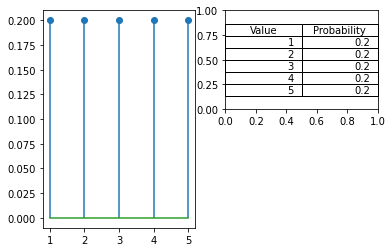

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Values and probabilities of X
vals = [i for i in range(1, 6)]
probs = [1/len(vals)] * len(vals)

# Table of PMF
plt.subplot(222)
plt.table(cellText=list(zip(vals, probs)), colLabels=['Value', 'Probability'], loc='center')

# Graph of PMF
plt.subplot(121)
pmf_plt = plt.stem(vals, probs, basefmt="C2-", use_line_collection=True)

# Test between 0 and 1 and sum
val_test = all(prob > 0 and prob < 1 for prob in probs)
sum_test = sum(probs) == 1

print(f'Probabilities in range(0,1): {val_test};\n'
      f'Probabilities sum equals 1: {sum_test}')

    (b) Build a function that will generate 50 random X-values from the pmf you created in part (a) and return the mean of these values.

In [39]:
import random
from statistics import mean, stdev

# Generates random list from vals
def random_list_mean():
    return mean(random.choices(vals, k=50))

print(f'Mean of random list: {random_list_mean()}')

Mean of random list: 3.38


    (c) Now, build a function that will run your function in part (b), 1, 000 times and store the means in a list.

In [40]:
# Generates random list from vals
def means_list():
    return [random_list_mean() for i in range(1000)]

f'Preview: {means_list()[:10]}', f'Length: {len(means_list())}'

('Preview: [3.06, 3.28, 2.82, 2.94, 2.98, 3.02, 3.34, 3.14, 3.08, 3.28]',
 'Length: 1000')

    (d) Create a histogram of the means in the list from part (c). Describe the shape of this histogram. What theorem tells us that it will look the way it does?

The histogram is visualizing the means of 1000 bootstrapped lists of random values ranging from 0-5.It takes on the shape of a bell curve. This is known as the central limit theorem.


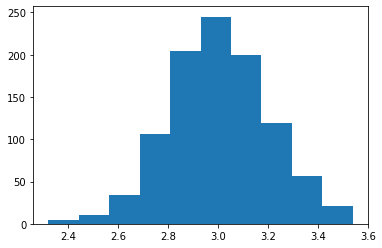

In [41]:
plt.hist(means_list())

print('The histogram is visualizing the means of 1000 bootstrapped lists of random values ranging from 0-5.'
      'It takes on the shape of a bell curve. This is known as the central limit theorem.')

    (e) What is the mean and standard deviation of your list of means? What are their theoretical values?

In [51]:
print(f'The sample (mean, standard deviation) is : {mean(means_list()), stdev(means_list())}')
print(f'The Theoretical (mean, standard deviation) is {mean(vals), stdev(vals)}')

The sample (mean, standard deviation) is : (2.9888, 0.1992213380678424)
The Theoretical (mean, standard deviation) is (3, 1.5811388300841898)
